In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske

/Library/Python/2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Titanic Facts
http://www.titanicfacts.net/titanic-passengers.html

Total Passangers: 1317

Details:

https://blog.socialcops.com/engineering/machine-learning-python/

In [2]:
titanic_df = pd.read_csv('/Users/avkashchauhan/learn/seattle-workshop/titanic_list.csv')

In [4]:
titanic_df.describe

<bound method DataFrame.describe of       pclass  survived                                               name  \
0        1.0       1.0                      Allen, Miss. Elisabeth Walton   
1        1.0       1.0                     Allison, Master. Hudson Trevor   
2        1.0       0.0                       Allison, Miss. Helen Loraine   
3        1.0       0.0               Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5        1.0       1.0                                Anderson, Mr. Harry   
6        1.0       1.0                  Andrews, Miss. Kornelia Theodosia   
7        1.0       0.0                             Andrews, Mr. Thomas Jr   
8        1.0       1.0      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9        1.0       0.0                            Artagaveytia, Mr. Ramon   
10       1.0       0.0                             Astor, Col. John Jacob   
11       1.0       1.0  Astor, Mrs. John

In [5]:
titanic_df.shape

(1310, 14)

In [6]:
titanic_df.columns

Index([u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body',
       u'home.dest'],
      dtype='object')

In [8]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# DataSet details

survival: Survival (0 = no; 1 = yes)

class: Passenger class (1 = first; 2 = second; 3 = third)

name: Name

sex: Sex

age: Age

sibsp: Number of siblings/spouses aboard

parch: Number of parents/children aboard

ticket: Ticket number

fare: Passenger fare

cabin: Cabin

embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat: Lifeboat (if survived)

body: Body number (if did not survive and body was recovered)

In [11]:
titanic_df['survived'].mean()

0.3819709702062643

In [13]:
titanic_df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1.0,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2.0,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3.0,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [14]:
class_sex_grouping = titanic_df.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1.0    female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2.0    female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3.0    female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

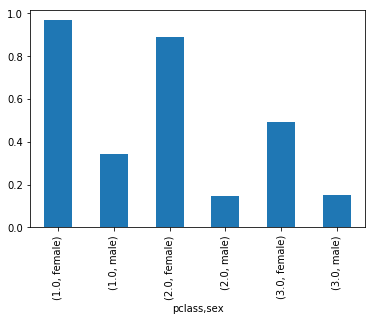

In [15]:
class_sex_grouping['survived'].plot.bar()

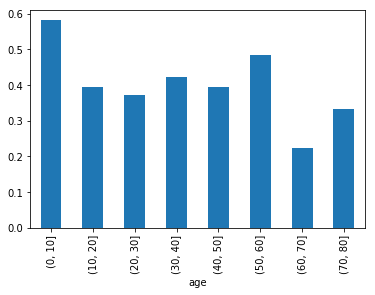

In [16]:
group_by_age = pd.cut(titanic_df["age"], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar()

In [21]:
print "You can see the data set has lots of missing entities"
titanic_df.count()

You can see the data set has lots of missing entities


pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [22]:
# Fixing inconsistencies 
titanic_df["home.dest"] = titanic_df["home.dest"].fillna("NA")
#removing body, cabin and boat features
titanic_df = titanic_df.drop(['body','cabin','boat'], axis=1)
#removing all NA values
titanic_df = titanic_df.dropna()

In [23]:
print "You will see the values are consitant now"
titanic_df.count()

You can see the data set has lots of missing entities


pclass       1043
survived     1043
name         1043
sex          1043
age          1043
sibsp        1043
parch        1043
ticket       1043
fare         1043
embarked     1043
home.dest    1043
dtype: int64

In [24]:
# We can also drop 'name','ticket','home.dest' features as it will not help
titanic_df = titanic_df.drop(['name','ticket','home.dest'], axis=1)
titanic_df.count()

pclass      1043
survived    1043
sex         1043
age         1043
sibsp       1043
parch       1043
fare        1043
embarked    1043
dtype: int64

In [30]:
titanic_df.sex = preprocessing.LabelEncoder().fit_transform(titanic_df.sex)
titanic_df.sex
# Now SEX convers to 0 and 1 instead of male or female 

0       0
1       1
2       0
3       1
4       0
5       1
6       0
7       1
8       0
9       1
10      1
11      0
12      0
13      0
14      1
16      1
17      0
18      0
19      1
20      1
21      0
22      1
23      0
24      0
25      1
26      1
27      0
28      0
29      1
30      1
       ..
1269    1
1270    1
1271    1
1272    1
1273    0
1274    1
1275    1
1276    0
1277    1
1278    1
1279    0
1280    1
1281    1
1285    1
1286    0
1287    1
1288    1
1289    1
1290    0
1294    1
1295    1
1296    1
1298    1
1299    1
1300    0
1301    1
1304    0
1306    1
1307    1
1308    1
Name: sex, dtype: int64

In [31]:
titanic_df.embarked = preprocessing.LabelEncoder().fit_transform(titanic_df.embarked)
titanic_df.embarked

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       0
10      0
11      0
12      0
13      2
14      2
16      0
17      0
18      0
19      0
20      2
21      2
22      0
23      0
24      2
25      0
26      0
27      0
28      2
29      2
30      2
       ..
1269    2
1270    2
1271    2
1272    2
1273    2
1274    2
1275    2
1276    2
1277    0
1278    2
1279    2
1280    2
1281    2
1285    2
1286    0
1287    2
1288    2
1289    2
1290    2
1294    2
1295    2
1296    2
1298    2
1299    0
1300    0
1301    0
1304    0
1306    0
1307    0
1308    2
Name: embarked, dtype: int64

In [33]:
# Create a dataframe which has all features we will use for model building
X = titanic_df.drop(['survived'], axis=1).values

In [36]:
y = titanic_df['survived'].values

In [38]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [44]:
#Decision Tree Classifier
classify_dt = tree.DecisionTreeClassifier(max_depth=10)

In [56]:
print " This result means the model correctly predicted survival rate of given value %"
classify_dt.fit (X_train, y_train)
scr = classify_dt.score (X_test, y_test)
print "score : " , scr
print "Model is able to correctly predict survival rate of", scr *100 , "% time.."

 This result means the model correctly predicted survival rate of given value %
score :  0.746411483254
Model is able to correctly predict survival rate of 74.6411483254 % time..


In [66]:
# Creating a vlidator data which works on 80%-20% 
shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)

In [61]:
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [67]:
test_classifier(classify_dt)
# Note: If you run shuffle_validator again and then run test classifier, you will see different accuracy

Accuracy: 0.7749 (+/- 0.02)


# Random Forest
The “Random Forest” classification algorithm will create a multitude of (generally very poor) trees for the data set using different random subsets of the input variables, and will return whichever prediction was returned by the most trees. This helps to avoid “overfitting”, a problem that occurs when a model is so tightly fitted to arbitrary correlations in the training data that it performs poorly on test data.

In [68]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.7825 (+/- 0.02)


In [82]:
# Performing Prediction

clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)

0.73205741626794263

# Gradient Boosting

The “Gradient Boosting” classifier will generate many weak, shallow prediction trees and will combine, or “boost”, them into a strong model. This model performs very well on our data set, but has the drawback of being relatively slow and difficult to optimize, as the model construction happens sequentially so it cannot be parallelized.

In [69]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

Accuracy: 0.8201 (+/- 0.02)


In [84]:
# Performing Prediction

clf_gb.fit(X_train, y_train)
clf_gb.score(X_test, y_test)

0.79904306220095689

# Voting Classifier
A “Voting” classifier can be used to apply multiple conceptually divergent classification models to the same data set and will return the majority vote from all of the classifiers. For instance, if the gradient boosting classifier predicts that a passenger will not survive, but the decision tree and random forest classifiers predict that they will live, the voting classifier will chose the latter.

In [86]:
eclf = ske.VotingClassifier([('dt', classify_dt), ('rf', clf_rf), ('gb', clf_gb)])
test_classifier(eclf)

Accuracy: 0.8050 (+/- 0.02)


In [87]:
# Performing Prediction

eclf.fit(X_train, y_train)
eclf.score(X_test, y_test)

0.77990430622009566

# Performing Prediction

In [101]:
# Collection 10 records from each passenger class - Create datset of 30 records
passengers_set_1 = titanic_df[titanic_df.pclass == 1].iloc[:10,:].copy()
passengers_set_2 = titanic_df[titanic_df.pclass == 2].iloc[:10,:].copy()
passengers_set_3 = titanic_df[titanic_df.pclass == 3].iloc[:10,:].copy()
passenger_set = pd.concat([passengers_set_1,passengers_set_2,passengers_set_3])
#testing_set = preprocess_titanic_df(passenger_set)

In [102]:
passenger_set.count()
# You must see 30 uniform records

pclass      30
survived    30
sex         30
age         30
sibsp       30
parch       30
fare        30
embarked    30
dtype: int64

In [103]:
passenger_set.survived.count()

30

In [98]:
titanic_df.count()

pclass      1043
survived    1043
sex         1043
age         1043
sibsp       1043
parch       1043
fare        1043
embarked    1043
dtype: int64

In [105]:
passenger_set_new = passenger_set.drop(['survived'], axis=1)
prediction = clf_rf.predict(passenger_set_new)

In [106]:
passenger_set[passenger_set.survived != prediction]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
605,3.0,1.0,1,25.0,0.0,0.0,7.650,2
606,3.0,1.0,1,20.0,0.0,0.0,7.925,2
